In [55]:
from pathlib import Path 
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import numpy as np

In [78]:
# job_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/single_md/00_300/788243")
# job_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/single_md/01_300_exp/788244")
# job_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/single_md/02_300_4/788245")
job_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/single_md/03_300_4_exp/788246")


In [79]:
def get_runtime(out_dir): 
    log_file = Path(out_dir, "log.csv")
    
    log_df = pd.read_csv(log_file, index_col=0)
    
    step_col_id = log_df.columns.get_loc("step")
    time_col_id = log_df.columns.get_loc("time")
    
    n_steps = log_df.iloc[-1, step_col_id]
    n_time = log_df.iloc[-1, time_col_id]
    
    return log_file, n_steps, n_time

In [80]:
print("CPUs: {}".format(multiprocessing.cpu_count()))
pool_obj = multiprocessing.Pool(
    multiprocessing.cpu_count()
)

pool_results = pool_obj.imap(
    get_runtime,
    list(job_dir.glob("output*"))
)

stats_dict = dict() 
stats_dict["log_file"] = list() 
stats_dict["n_steps"] = list() 
stats_dict["n_time"] = list() 
for result in pool_results:
    log_file, n_steps, n_time = result 
    stats_dict["log_file"].append(log_file)
    stats_dict["n_steps"].append(n_steps)
    stats_dict["n_time"].append(n_time)


CPUs: 24


In [81]:
stats_df = pd.DataFrame(stats_dict)
stats_df.head()

,log_file,n_steps,n_time
0,/wynton/group/sali/mhancock/xray/sample_bench/...,131000,86181.646419
1,/wynton/group/sali/mhancock/xray/sample_bench/...,83000,86131.923398
2,/wynton/group/sali/mhancock/xray/sample_bench/...,82000,85950.299772
3,/wynton/group/sali/mhancock/xray/sample_bench/...,82000,86010.412953
4,/wynton/group/sali/mhancock/xray/sample_bench/...,83000,86031.401851


In [82]:
print(np.mean(stats_df["n_steps"]))
print(np.std(stats_df["n_steps"]))

65215.615
28879.533017082787


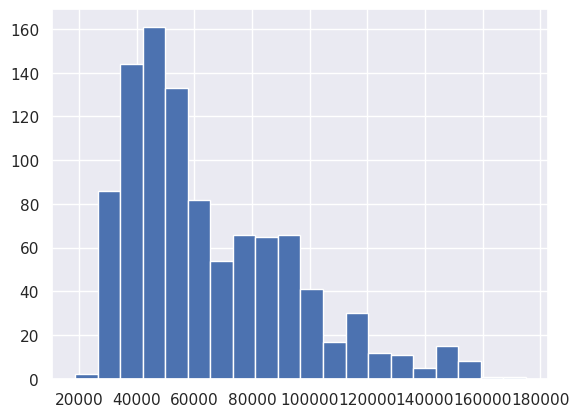

In [83]:
plt.hist(stats_df["n_steps"], bins=20)
plt.show()